In [1]:
import numpy as np
import pandas as pd

In [2]:
ratings_df = pd.read_csv("Section data/District level forecast/expert_rating.csv")

In [3]:
ratings_df.head()

,year,state,district,cook,rothenberg,cq_politics,sabatos_crystal_ball,real_clear,roll_call,ny_times,the_hill,daily_kos,fivethirtyeight,ddhq,elections_daily,politico,fox,the_economist,avg_rating
0,2010,Alabama,2,4,4.75,4.0,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.95
1,2010,Alabama,5,6,7.00,7.0,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.40
2,2010,Arizona,1,5,5.50,5.0,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.10
3,2010,Arizona,3,5,7.00,7.0,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.80
4,2010,Arizona,5,4,4.75,4.0,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.55


In [4]:
district_history = pd.read_csv("Section data/District level forecast/house party vote share by district 1948-2020.csv")

In [5]:
district_history.head()

,Office,State,CensusPop,raceYear,Area,RepVotes,RepCandidate,RepStatus,DemVotes,DemCandidate,...,raceNotes,st_fips,state_abb,CD,district_num,district_id,WinnerParty,TotalVotesMajor,vote_margin,R_vote_margin
0,House,Alabama,NaN,2020,District 1,211825,"Carl, Jerry",Challenger,116949,"Averhart, James",...,NaN,1,AL,AL-01,1,AL01,R,328774,0.288575,0.2886
1,House,Alabama,NaN,2020,District 2,197996,"Moore, Barry",Challenger,105286,"Harvey-Hall, Phyllis",...,NaN,1,AL,AL-02,2,AL02,R,303282,0.305689,0.3056
2,House,Alabama,NaN,2020,District 3,217384,"Rogers, Mike D.",Incumbent,104595,"Winfrey, Adia McClellan",...,NaN,1,AL,AL-03,3,AL03,R,321979,0.350299,0.3502
3,House,Alabama,NaN,2020,District 4,261553,"Aderholt, Robert",Incumbent,56237,"Neighbors, Rick",...,NaN,1,AL,AL-04,4,AL04,R,317790,0.646074,0.6460
4,House,Alabama,NaN,2020,District 5,253094,"Brooks, Mo",Incumbent,0,NaN,...,NaN,1,AL,AL-05,5,AL05,R,253094,0.956277,1.0000


In [7]:
district_history.columns

Index(['Office', 'State', 'CensusPop', 'raceYear', 'Area', 'RepVotes',
       'RepCandidate', 'RepStatus', 'DemVotes', 'DemCandidate', 'DemStatus',
       'ThirdParty', 'ThirdVotes', 'ThirdCandidate', 'ThirdStatus',
       'OtherVotes', 'PluralityVotes', 'PluralityParty',
       'ThirdVotesTotalPercent', 'RepVotesMajorPercent',
       'DemVotesMajorPercent', 'raceNotes', 'st_fips', 'state_abb', 'CD',
       'district_num', 'district_id', 'WinnerParty', 'TotalVotesMajor',
       'vote_margin', 'R_vote_margin'],
      dtype='object')

In [25]:
train_data = district_history[["State", "district_num", "raceYear", "CD", "RepStatus", "DemStatus", "RepVotesMajorPercent"]]

In [26]:
train_data["Rep Inc"] = train_data["RepStatus"] == "Incumbent"
train_data["Dem Inc"] = train_data["DemStatus"] == "Incumbent"

<ipython-input-26-d3516bb75369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Rep Inc"] = train_data["RepStatus"] == "Incumbent"
<ipython-input-26-d3516bb75369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Dem Inc"] = train_data["DemStatus"] == "Incumbent"


In [27]:
contested_races = train_data[~((train_data["RepVotesMajorPercent"] >= 99) | (train_data["RepVotesMajorPercent"] <= 1))]

In [33]:
contested_races

,State,district_num,raceYear,CD,RepStatus,DemStatus,RepVotesMajorPercent,Rep Inc,Dem Inc
0,Alabama,1,2020,AL-01,Challenger,Challenger,64.43,False,False
1,Alabama,2,2020,AL-02,Challenger,Challenger,65.28,False,False
2,Alabama,3,2020,AL-03,Incumbent,Challenger,67.51,True,False
3,Alabama,4,2020,AL-04,Incumbent,Challenger,82.30,True,False
7,Alaska,0,2020,AK-AL,Incumbent,Challenger,54.58,True,False
...,...,...,...,...,...,...,...,...,...
16061,Wisconsin,6,1948,WI-06,Incumbent,Challenger,55.91,True,False
16062,Wisconsin,7,1948,WI-07,Incumbent,Challenger,63.37,True,False
16063,Wisconsin,8,1948,WI-08,Incumbent,Challenger,57.09,True,False
16065,Wisconsin,10,1948,WI-10,Incumbent,Challenger,56.87,True,False


In [42]:
ratings_no_al = ratings_df[ratings_df["district"].str.isnumeric()]
ratings_no_al["district"] = ratings_no_al["district"].astype(int)

<ipython-input-42-22bd3403cf04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_no_al["district"] = ratings_no_al["district"].astype(int)


In [46]:
train_all = pd.merge(contested_races, ratings_no_al, how="left", left_on=["raceYear", "State", "district_num"], right_on = ["year", "state", "district"])

In [47]:
train_ratings = train_all[~train_all["year"].isna()]

In [84]:
train_ratings[["year", "state", "district", "Rep Inc","Dem Inc","avg_rating", "RepVotesMajorPercent"]].to_csv("competitive_races.csv", index=False)

In [59]:
train_ratings[["Rep Inc","Dem Inc","avg_rating", "RepVotesMajorPercent"]]

,Rep Inc,Dem Inc,avg_rating,RepVotesMajorPercent
5,False,True,2.34375,48.39
6,False,True,1.12500,44.88
10,True,False,4.12500,52.17
14,True,False,4.50000,55.37
17,True,False,6.50000,56.99
...,...,...,...,...
2303,False,False,4.20000,50.40
2305,False,True,2.00000,43.96
2308,False,True,2.75000,48.04
2312,False,False,4.55000,53.98


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(train_ratings[["Rep Inc","Dem Inc","avg_rating"]], train_ratings["RepVotesMajorPercent"])

LinearRegression()

In [67]:
lr.score(train_ratings[["Rep Inc","Dem Inc","avg_rating"]], train_ratings["RepVotesMajorPercent"])

0.7208356296975827

In [72]:
train_2018 = train_ratings[train_ratings["year"] == 2018]

In [74]:
train_2018["vote_spread"] = 2*(train_2018["RepVotesMajorPercent"] - 50)

<ipython-input-74-dbe42404cf87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2018["vote_spread"] = 2*(train_2018["RepVotesMajorPercent"] - 50)


In [81]:
train_2018[["State", "district_num", "cook", "daily_kos", "fivethirtyeight", "vote_spread"]].to_csv("selected_experts_2018.csv", index=False)

In [ ]:
experts = ["cook", "daily_kos", "fivethirtyeight"]
for i in range(1, 7+1):
    expert_means = []
    for expert in experts:
        train_2018[train_2018[expert] == i]["vote_spread"].mean()

In [78]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

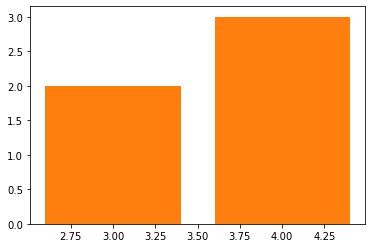

In [80]:
fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')